## Setup
###Clone IBM FM4M github repository

In [ ]:
!git clone https://github.com/IBM/materials.git

Cloning into 'materials'...
remote: Enumerating objects: 1599, done.
remote: Counting objects: 100% (559/559), done.
remote: Compressing objects: 100% (232/232), done.
remote: Total 1599 (delta 361), reused 420 (delta 314), pack-reused 1040 (from 2)
Receiving objects: 100% (1599/1599), 74.28 MiB | 28.82 MiB/s, done.
Resolving deltas: 100% (804/804), done.
Updating files: 100% (786/786), done.


### Install packages

In [ ]:
!pip install torch-scatter -f https://data.pyg.org/whl/torch-$(python -c "import torch; print(torch.__version__.split('+')[0])")+cpu.html

Looking in links: https://data.pyg.org/whl/torch-2.8.0+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.6/645.6 kB 19.5 MB/s eta 0:00:00


In [ ]:
!pip install umap-learn selfies datasets rdkit torch-geometric xgboost torch-nl ase==3.24.0 torch_scatter mordred

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.7 MB/s eta 0:00:00
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176718 sha256=8f3ce035

### Import Libraries

In [ ]:
import sys
sys.path.append("/content/materials/models")
sys.path.append("/content/materials/")
!cd /content/materials/examples

In [ ]:
ls

materials/  sample_data/


In [ ]:
import models.fm4m as fm4m
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

/content/materials/models/mhg_model/graph_grammar/hypergraph.py:421: SyntaxWarning: invalid escape sequence '\i'
  True if self \in hg,
/content/materials/models/smi_ted/smi_ted_light/load.py:1: SyntaxWarning: invalid escape sequence '\['
  PATTERN = "(\[[^\]]+]|Br?|Cl?|N|O|S|P|F|I|b|c|n|o|s|p|\(|\)|\.|=|#|-|\+|\\\\|\/|:|~|@|\?|>|\*|\$|\%[0-9]{2}|[0-9])"
/content/materials/models/pos_egnn/posegnn/ops.py:282: SyntaxWarning: invalid escape sequence '\m'
  cutoff: center of last Gaussian function, :math:`\mu_{N_g}`


## FM4M Architecture

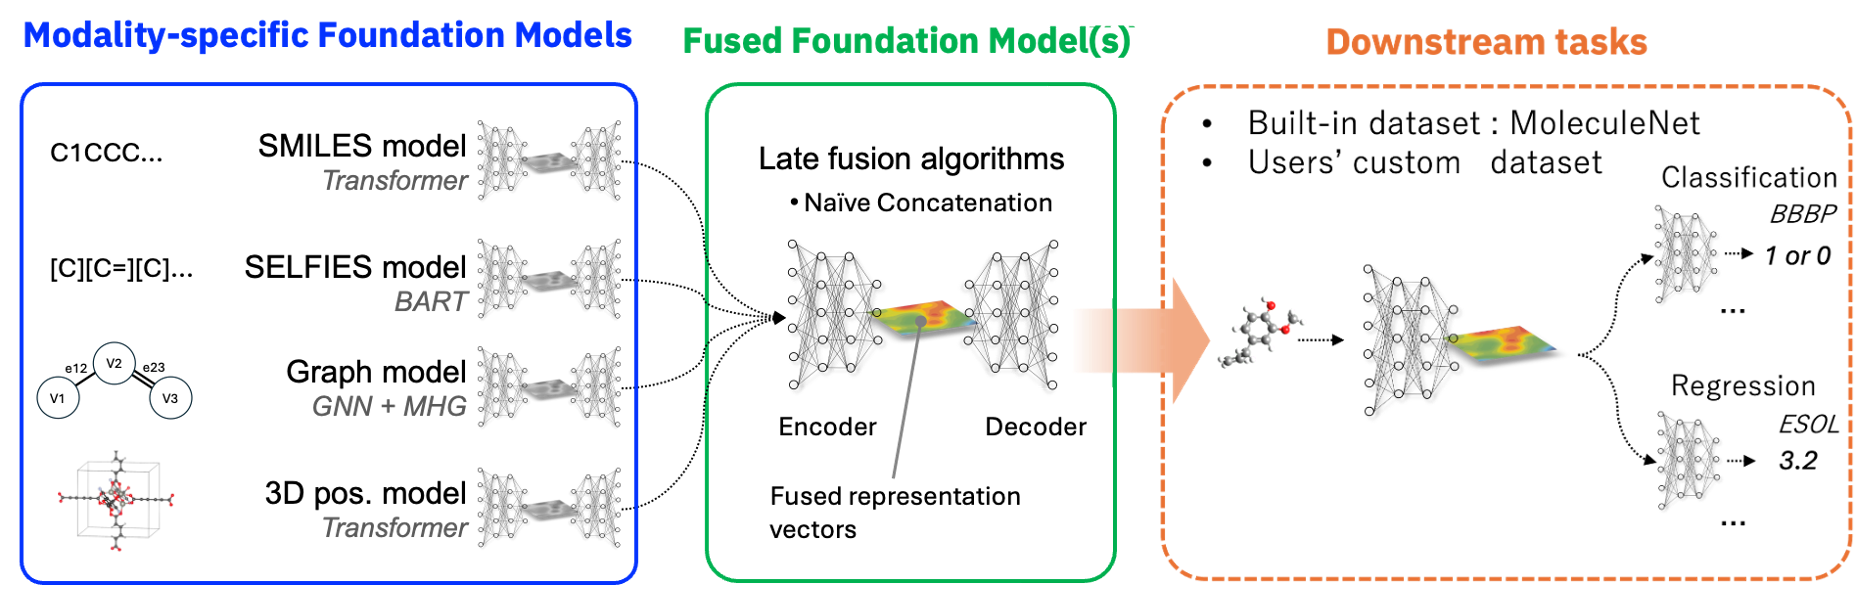

## Workflow
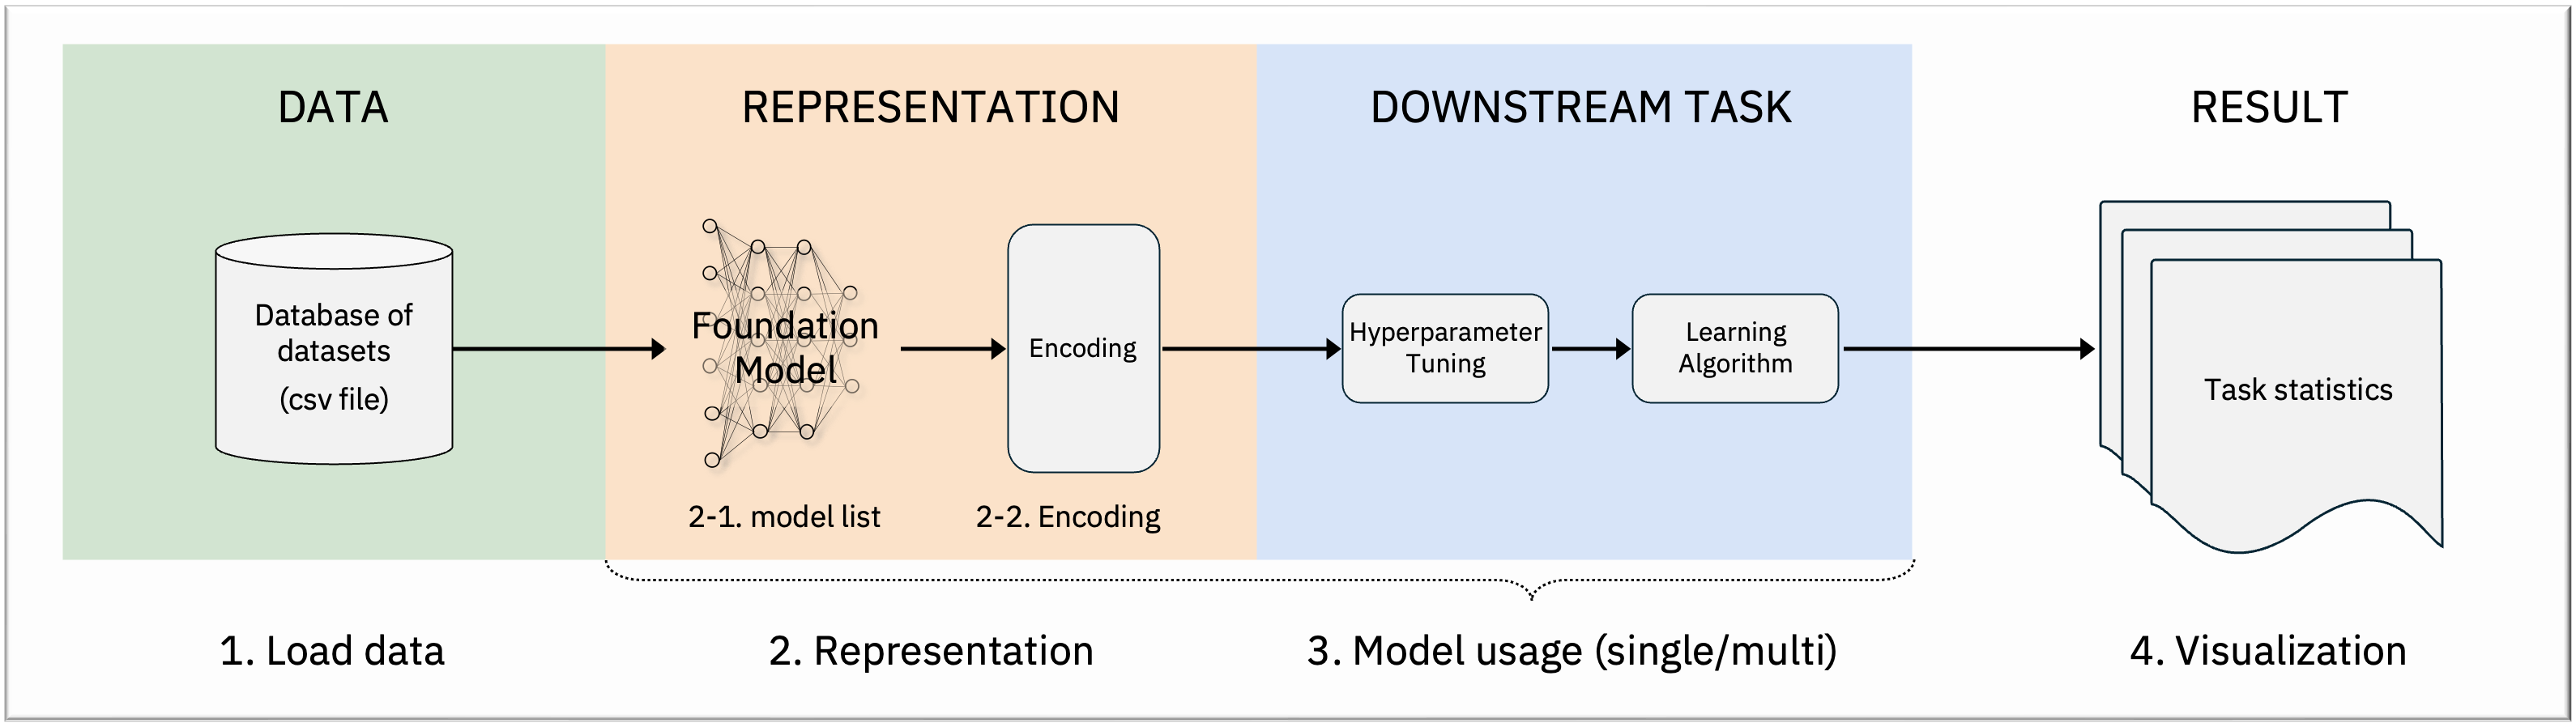

## 1. Load Data


In [ ]:
train_df  = pd.read_csv(f"/content/materials/data/bace/train.csv")
test_df  = pd.read_csv(f"/content/materials/data/bace/test.csv")

In [ ]:
print(f"shape of train_df: {train_df.shape}")
train_df.head(3)

shape of train_df: (1209, 595)


,smiles,CID,Class,Unnamed: 3,pIC50,MW,AlogP,HBA,HBD,RB,...,PEOE6 (PEOE6),PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,BACE_1,1,NaN,9.154901,431.56979,4.4014,3,2,5,...,53.205711,78.640335,226.85541,107.43491,37.133846,0.000000,7.98017,0.0,0.000000,1
1,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_3,1,NaN,8.698970,591.74091,2.5499,4,3,11,...,70.365707,47.941147,192.40652,255.75255,23.654478,0.230159,15.87979,0.0,24.663788,3
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_5,1,NaN,8.698970,629.71283,3.5086,3,3,11,...,78.945702,39.361153,179.71288,220.46130,23.654478,0.230159,15.87979,0.0,26.100143,5


In [ ]:
input = "smiles"
output = "Class"

xtrain = list(train_df[input].values)
ytrain = list(train_df[output].values)

xtest = list(test_df[input].values)
ytest = list(test_df[output].values)

]## 2. Representation
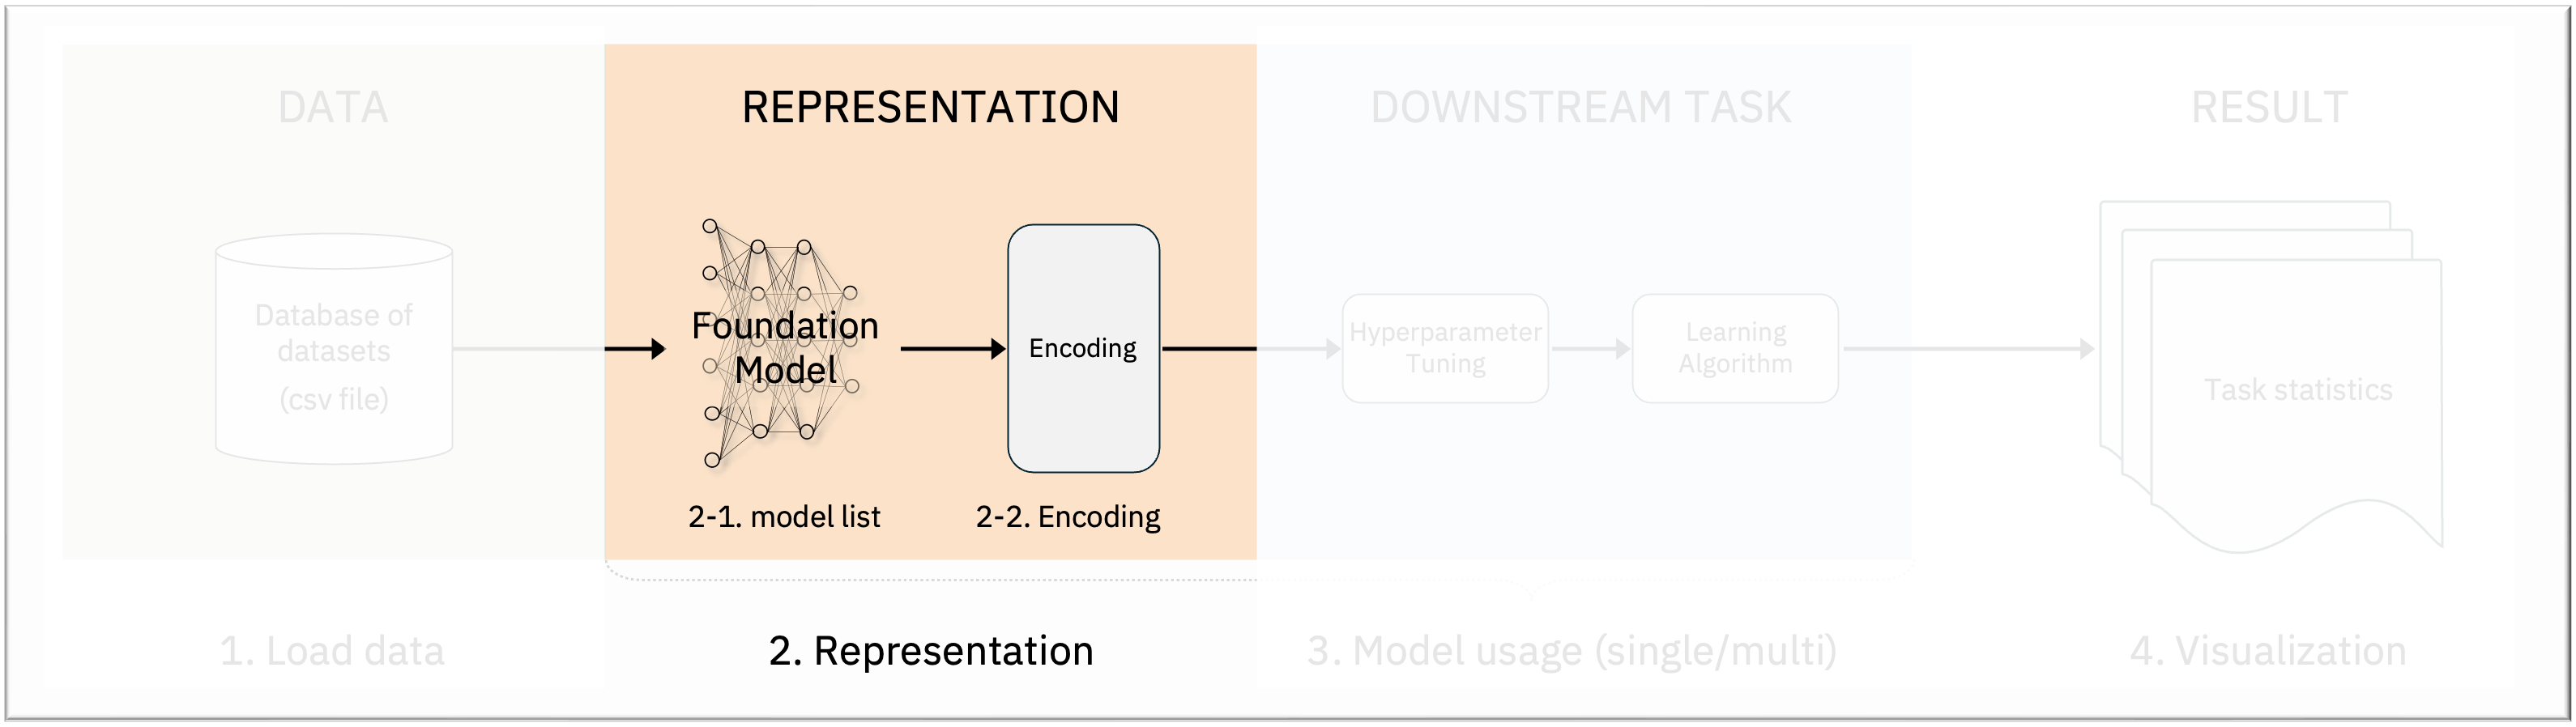

In [ ]:
fm4m.avail_models()

,Model Name,Description
0,SMI-TED,SMILES based encoder decoder model
1,SELFIES-TED,BART model for string based SELFIES modality
2,MolFormer,MolFormer model for string based SMILES modality
3,MHG-GED,Molecular hypergraph model
4,POS-EGNN,3D atom position model
5,Mordred,Baseline: A descriptor-calculation software ap...
6,MorganFingerprint,Baseline: Circular atom environments based des...


### 2-2. Encoding

In [ ]:
x_batch, x_batch_test = fm4m.get_representation(xtrain, xtest, model_type = 'SELFIES-TED', return_tensor = False)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/534 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.43G [00:00<?, ?B/s]

Encoding: 100%|██████████| 2/2 [01:07<00:00, 33.67s/it]


In [ ]:
print(f"x_batch shape: {x_batch.shape}, x_batch_test shape: {x_batch_test.shape}")
x_batch

## 3. Model usage
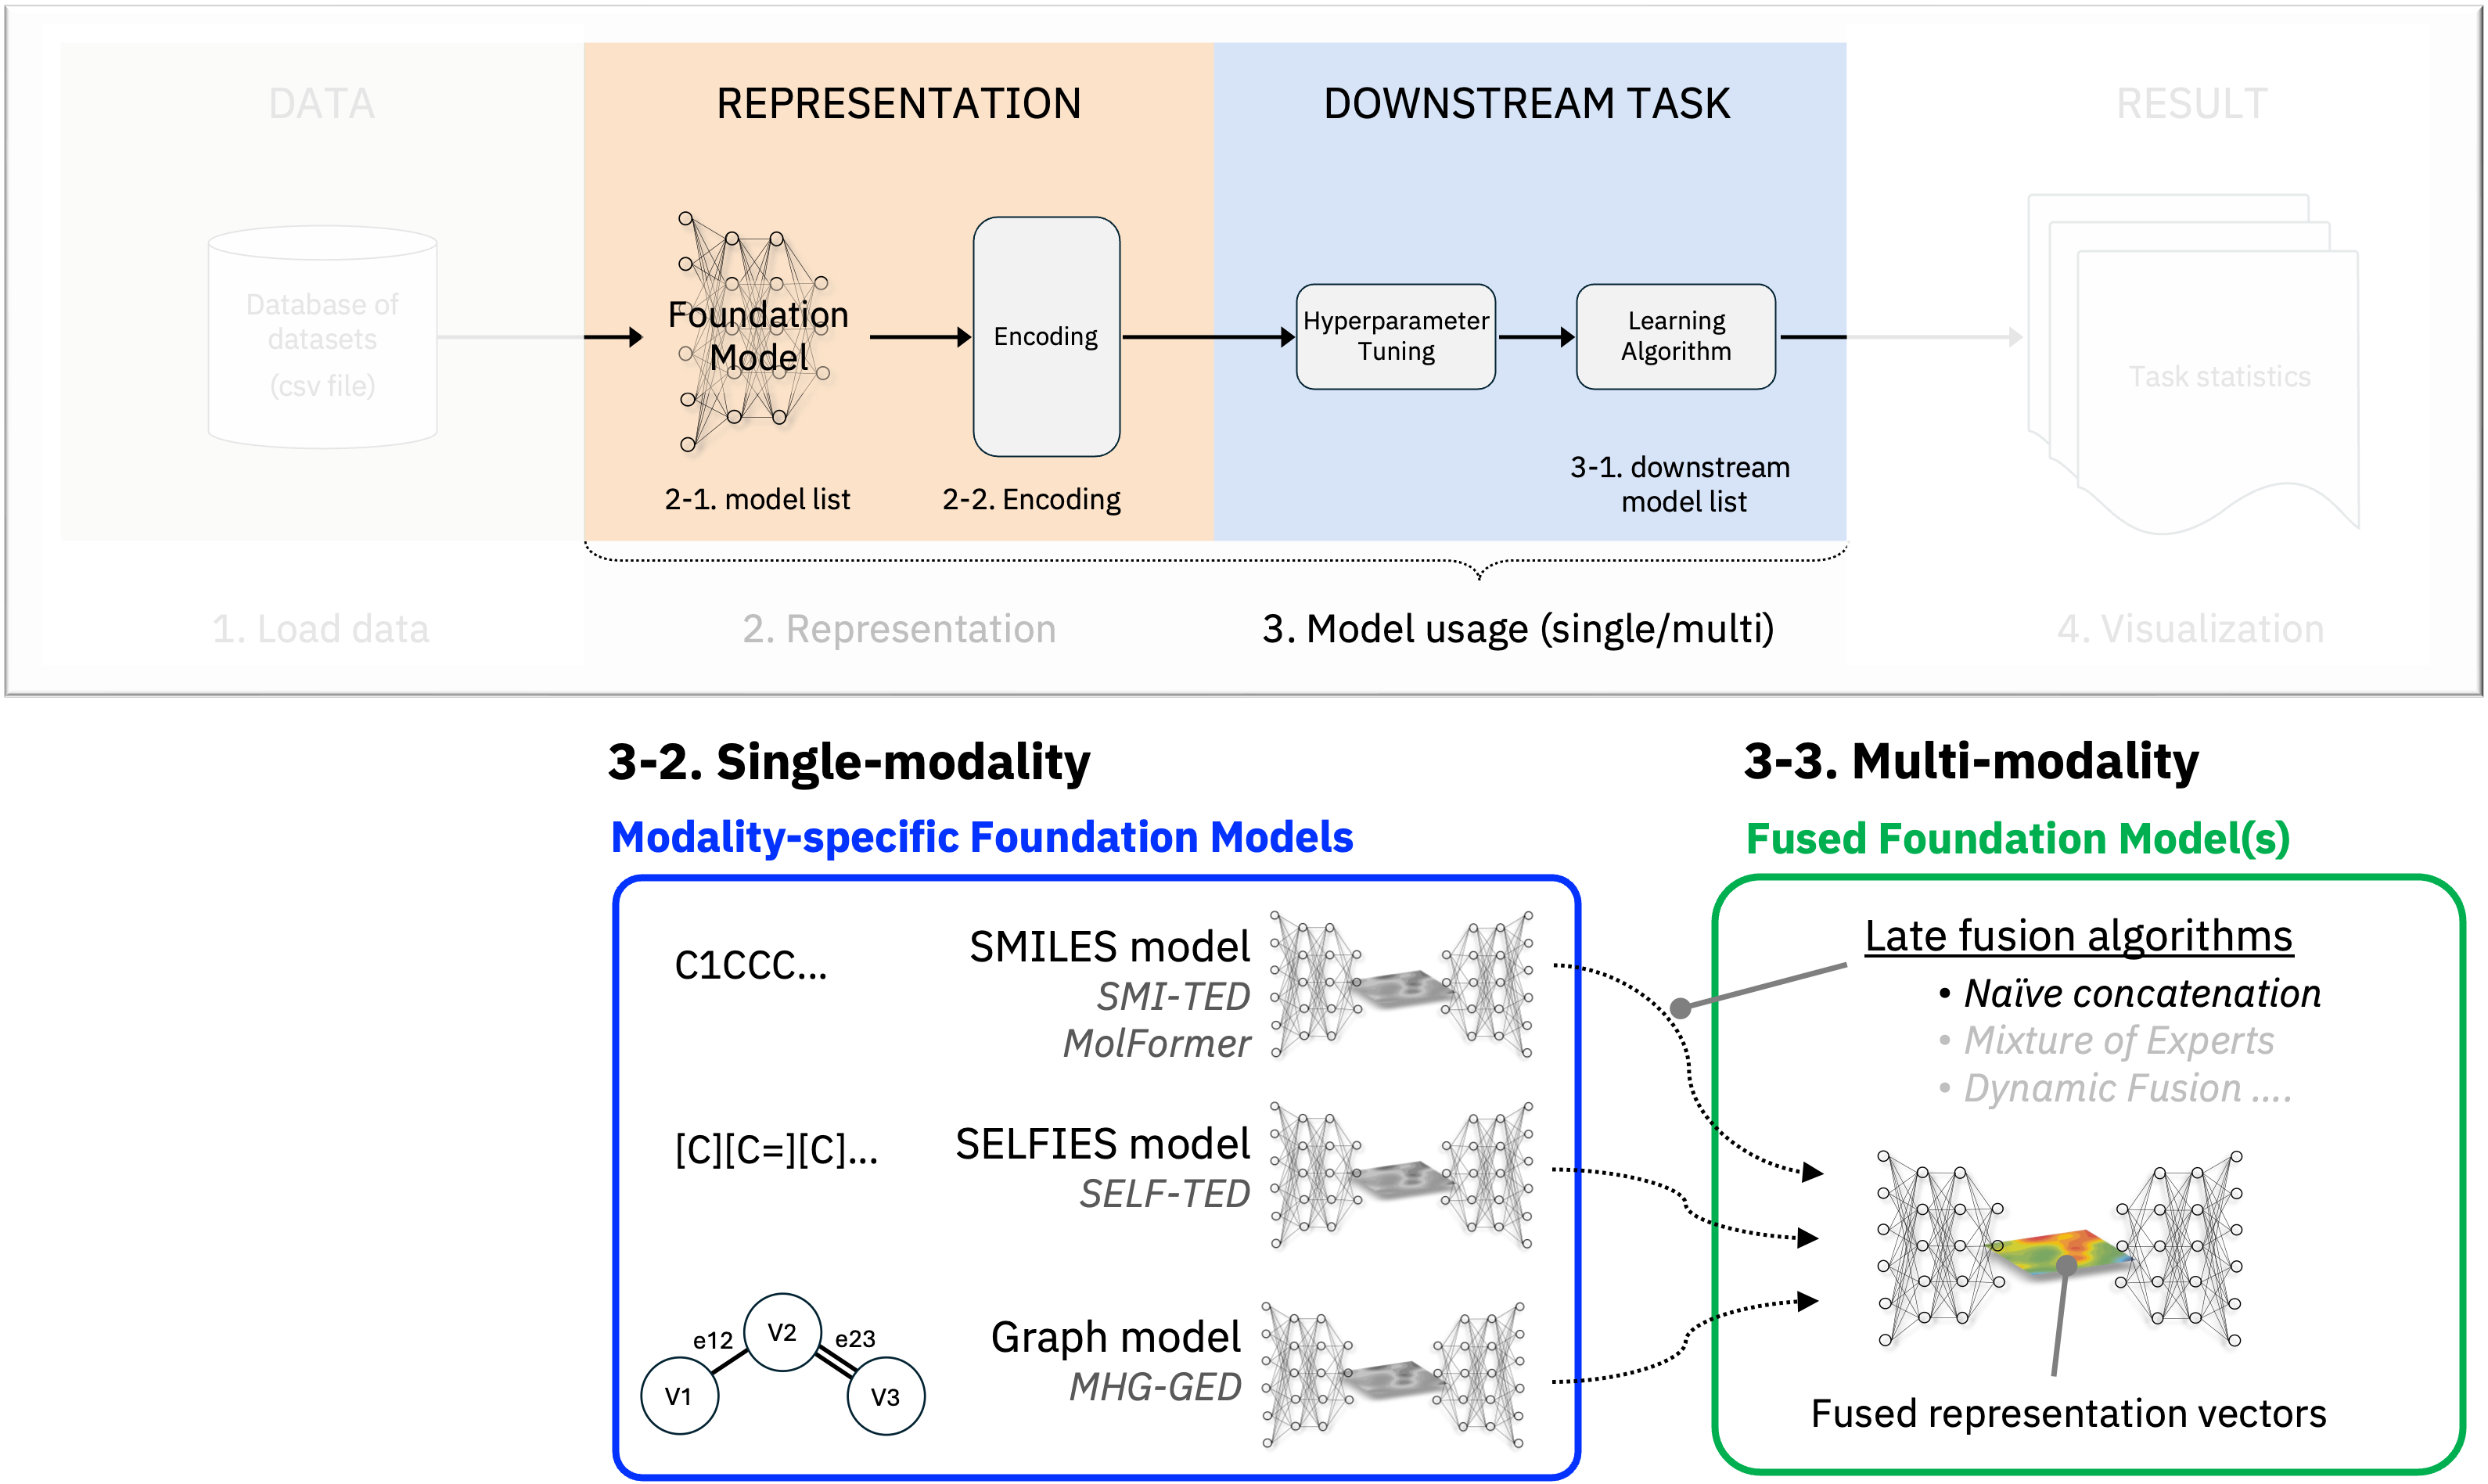

### 3-1. List of Downstream Models

In [ ]:
fm4m.avail_downstream_models()

,Name,Task Type
0,XGBClassifier,Classfication
1,DefaultClassifier,Classfication
2,SVR,Regression
3,Kernel Ridge,Regression
4,Linear Regression,Regression
5,DefaultRegressor,Regression


### 3-2. Example of single-modal model usage

In [ ]:
result = fm4m.single_modal(model="SELFIES-TED", x_train=xtrain, y_train=ytrain, x_test=xtest, y_test=ytest, downstream_model="DefaultClassifier")

print(f"result[0]: Result, '{result[0]}', {type(result[0])}")
print(f"result[1]: Row score, {result[1]}, {type(result[1])}")
print(f"result[2]: False Positive Rate, type {type(result[2])}")
print(f"result[3]: True Positive Rate, type {type(result[3])}")
print(f"result[4]: Class_0 latent space, type {type(result[4])}")
print(f"result[5]: Class_1 latent space, type {type(result[5])}")

SELFIES-TED


tokenizer_config.json:   0%|          | 0.00/534 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/548k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.43G [00:00<?, ?B/s]

Encoding: 100%|██████████| 2/2 [01:32<00:00, 46.36s/it]


 Calculating ROC AUC Score ...
ROC-AUC Score: 0.8520
Generating latent plots


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Generating latent plots : Done
result[0]: Result, 'ROC-AUC Score: 0.8520', <class 'str'>
result[1]: Row score, 0.8519809244314013, <class 'numpy.float64'>
result[2]: False Positive Rate, type <class 'numpy.ndarray'>
result[3]: True Positive Rate, type <class 'numpy.ndarray'>
result[4]: Class_0 latent space, type <class 'numpy.ndarray'>
result[5]: Class_1 latent space, type <class 'numpy.ndarray'>


### 3-3. Example of multi-modal model usage

In [ ]:
result = fm4m.multi_modal(model_list=["MHG-GED","SMI-TED"], x_train=xtrain, y_train=ytrain, x_test=xtest, y_test=ytest, downstream_model="DefaultClassifier")

NameError: name 'fm4m' is not defined

In [ ]:
result[0]

## 4. Visualization
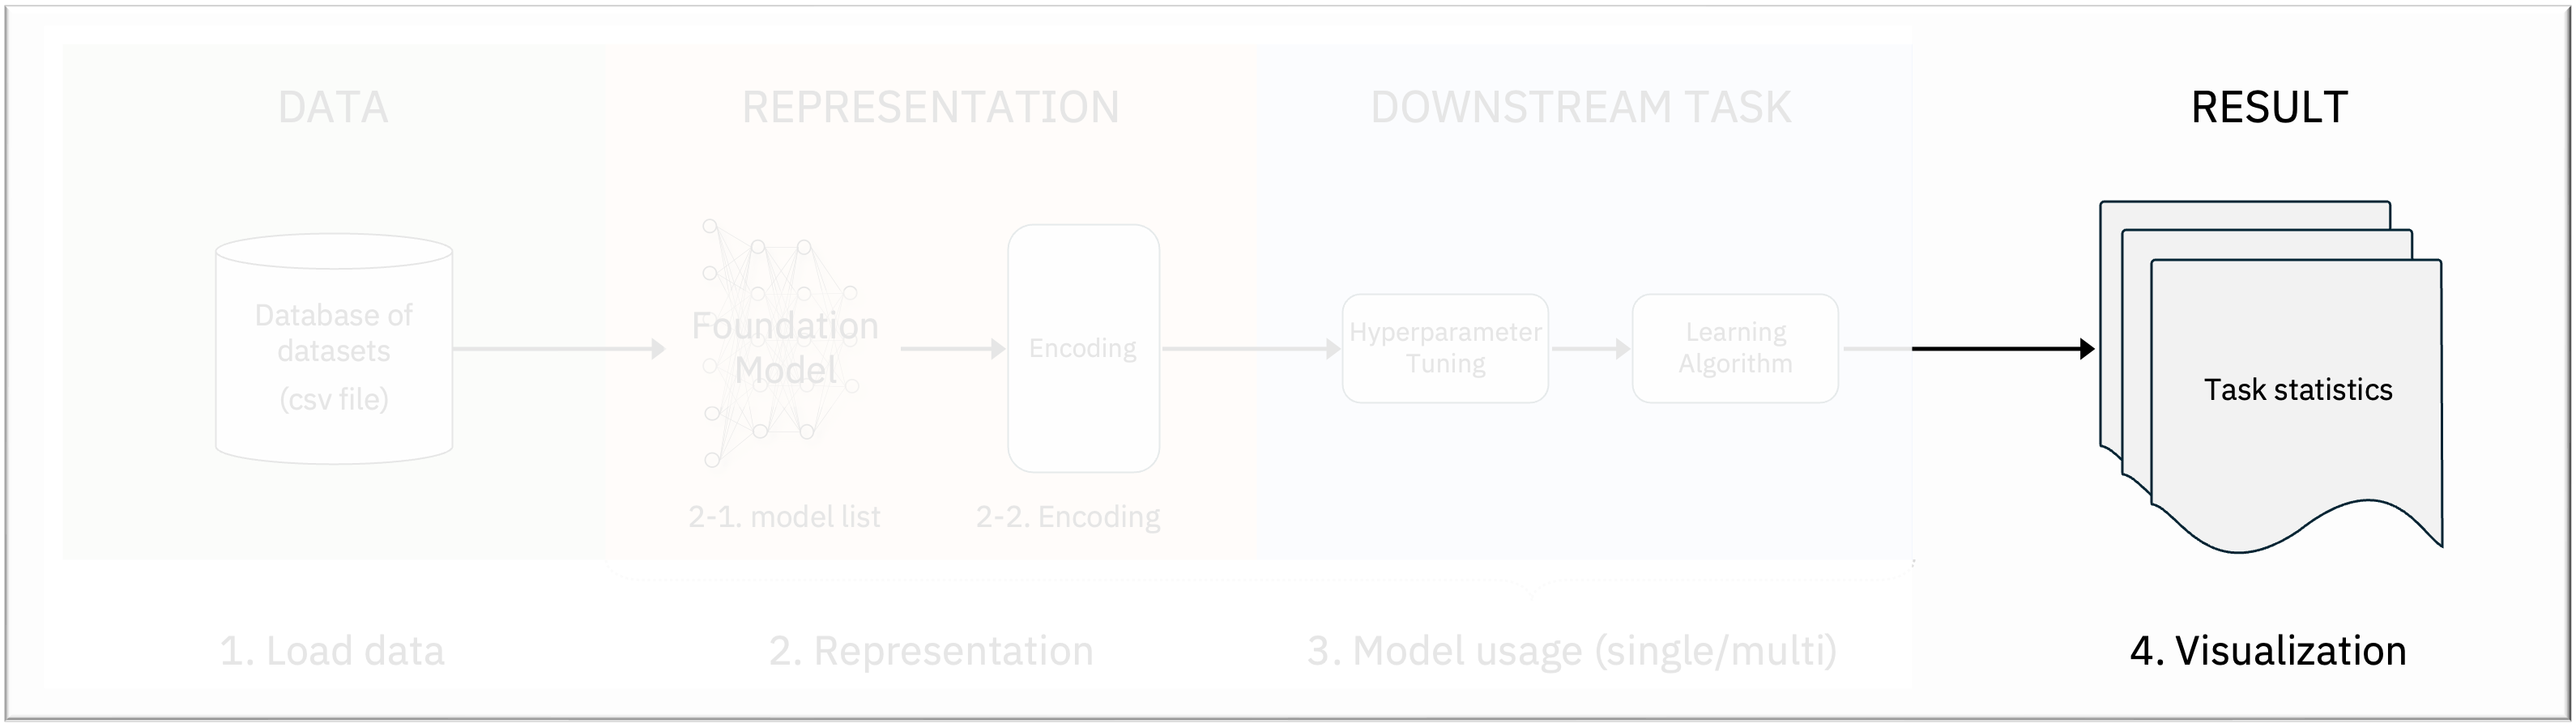

### 4-1. ROC-AUC: Classification task

In [ ]:
import matplotlib.pyplot as plt

NameError: name 'result' is not defined

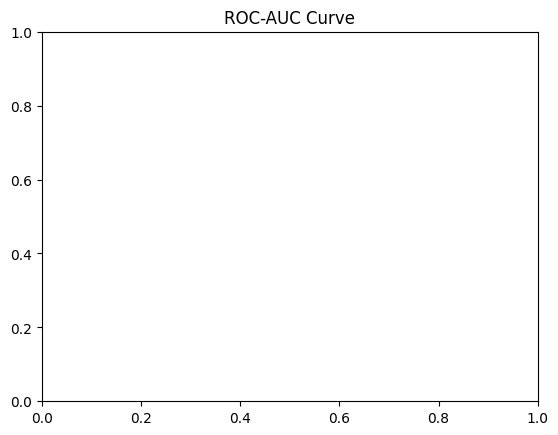

In [ ]:
fig, ax = plt.subplots()
ax.set_title("ROC-AUC Curve")
ax.plot(result[2], result[3], color='darkorange', lw=2, label=f'ROC curve (area = {result[1]:.4f})')
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic')
ax.legend(loc='lower right')



### 4-2. Latent space: Classification task

In [ ]:
fig, ax = plt.subplots()
ax.set_title("T-SNE Plot")

class_0 = result[4]
class_1 = result[5]

plt.scatter(class_1[:, 0], class_1[:, 1], c='red', label='Class 1')
plt.scatter(class_0[:, 0], class_0[:, 1], c='blue', label='Class 0')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend(loc='lower right')

ax.set_title('Dataset Distribution')

### 4-3. Parity Plot: Regression task

In [ ]:
train_df  = pd.read_csv(f"/content/materials/data/esol/train.csv")
test_df  = pd.read_csv(f"/content/materials/data/esol/test.csv")

In [ ]:
train_df.head(2)

In [ ]:
input = "smiles"
output = "prop"

xtrain = list(train_df[input].values)
ytrain = list(train_df[output].values)

xtest = list(test_df[input].values)
ytest = list(test_df[output].values)

In [ ]:
params = {'kernel': 'rbf', 'C': 2.0}
result = fm4m.single_modal(model="SELFIES-TED", x_train=xtrain, y_train=ytrain, x_test=xtest, y_test=ytest, downstream_model="SVR", params=params)

In [ ]:
print(f"result[0]: Result, '{result[0]}', {type(result[0])}")
print(f"result[1]: Row score, {result[1]}, {type(result[1])}")
print(f"result[2]: Actual property values, type {type(result[2])}")
print(f"result[3]: Predicted property values, type {type(result[3])}")
print(f"result[4] & result[5]: latent space, shape {np.concatenate([result[4], result[5]]).shape}")

In [ ]:
fig, ax = plt.subplots()
ax.set_title("Parity plot")
y_batch_test = np.array(result[2], dtype=float)
y_prob = np.array(result[3], dtype=float)
ax.scatter(y_batch_test, y_prob, color="blue", label=f"Predicted vs Actual (RMSE: {result[1]:.4f})")
min_val = min(min(y_batch_test), min(y_prob))
max_val = max(max(y_batch_test), max(y_prob))
ax.plot([min_val, max_val], [min_val, max_val], 'r-')

ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.legend(loc='lower right')

## Supplementary


### Data split for custom dataset

In [ ]:
df_data  = pd.read_csv(f"enter data path")

n=int(len(df_data)*2/3)
train_df = df_data.sample(n=n, random_state=42)
test_df = df_data.drop(train_df.index)

In [ ]:
input = "enter input coulumn name"
output = "enter output coulumn name"

xtrain = list(train_df[input].values)
ytrain = list(train_df[output].values)

xtest = list(test_df[input].values)
ytest = list(test_df[output].values)